<a href="https://colab.research.google.com/github/EgorSu/house_price/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [18]:
data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
dict_encoder = dict()
def transform_func(x):
    return np.log(x)
def inverse_transform_func(x):
    return np.exp(x) 
def fit_target_encoder(data, feature_name, target):
    j = 1
    unique_val = list(data[feature_name].unique())
    dict_encoder[feature_name] = dict()        
    data.fillna(0, inplace = True)
    for i in unique_val:
        if i != 0:
            dict_encoder[feature_name][i] = int(j) 
            data.loc[data[feature_name] == i,feature_name] = int(j) 
            j += 1
    data[feature_name] = data[feature_name].astype("int64")
def target_encoder(data, feature_name):
    data.fillna(0, inplace = True)
    for i in list(data[feature_name].unique()):
        if i != 0 and i in dict_encoder[feature_name].keys(): 
            data.loc[data[feature_name] == i, feature_name] = dict_encoder[feature_name][i]
        else:
            print(feature_name)
            print(dict_encoder[feature_name].keys())
            print("{0} key not found in {1}".format(i, feature_name))  
    return data        
def model_estimator(model, data):
    model.fit(data[0], data[1])
    print("train score {0}, test score {1}".format(model.score(data[0], data[1]), model.score(data[2], data[3])))
    print("trian log_loss {0}, test log_loss {1}".format(msle(inverse_transform_func(data[1]), inverse_transform_func(model.predict(data[0]))),                                                         msle(inverse_transform_func(data[3]), inverse_transform_func(model.predict(data[2]))))) 



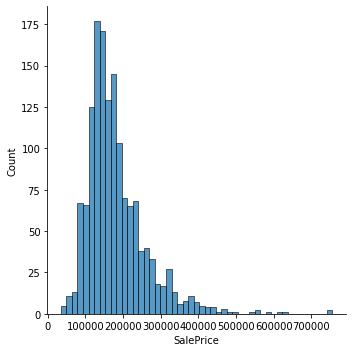

In [11]:
sns.displot(data, x = 'SalePrice')

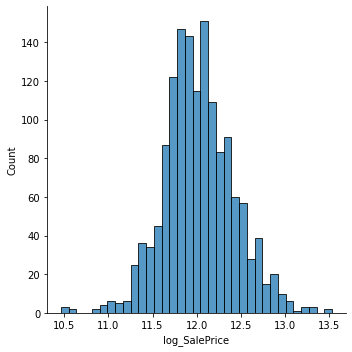

In [20]:
data = data.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'])
data['log_SalePrice'] = transform_func(data['SalePrice'])
sns.displot(data, x = 'log_SalePrice')


In [21]:
categorial_features = list(data.select_dtypes(include = ["object"]).columns)
number_features = list(data.select_dtypes(include = ["number"]).columns)
number_features.remove('SalePrice')
number_features.remove('log_SalePrice')

In [ ]:
for i in number_features:
    if data[i].nunique() < 25:
        #sns.boxplot(data = data, x = i, y = 'log_SalePrice')
        print(data[i].value_counts())
    else:    
        #sns.scatterplot(data = data, x = i, y = 'log_SalePrice')
        print("{0} has too many unique values".format(i))
    #plt.show()
    

Id has too many unique values
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
LotFrontage has too many unique values
LotArea has too many unique values
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
YearBuilt has too many unique values
YearRemodAdd has too many unique values
MasVnrArea has too many unique values
BsmtFinSF1 has too many unique values
BsmtFinSF2 has too many unique values
BsmtUnfSF has too many unique values
TotalBsmtSF has too many unique values
1stFlrSF has too many unique values
2ndFlrSF has too many unique values
0      1434
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
479     

In [14]:
for i in categorial_features:
    #sns.boxplot(data = data, x=i, y = 'log_SalePrice')
    #plt.show()
    print(data[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

In [22]:
data = data.drop(columns = ['Street', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterCond','BsmtCond', 'BsmtFinType2', 'Heating','CentralAir', 'Electrical', 'Functional', 'GarageCond', 'SaleType', 'SaleCondition', 'OverallCond', 'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])

In [23]:
remake_list = ['LotShape', 'Condition1', 'HouseStyle', 'Exterior2nd', 'Foundation', 'HeatingQC', 'GarageType', 'GarageCars']
for i in remake_list:
    print(data[i].value_counts())

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
2    824
1    369
3    181
0  

In [24]:
for i in remake_list:
    print(i, data[i].unique())

LotShape ['Reg' 'IR1' 'IR2' 'IR3']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageCars [2 3 1 0 4]


In [25]:
def create_other_categories(data, good_categories: list, new_name = 'Other'):
    return data.apply(lambda x: x if x in good_categories else new_name)
def change_categories(data):
    data['LotShape'] = create_other_categories(data['LotShape'], ['Reg'], 'IR')
    data['Condition1'] = create_other_categories(data['Condition1'], ['Norm'])
    data['HouseStyle'] = create_other_categories(data['HouseStyle'], ['1Story', '2Story'])
    data['Exterior2nd'] = create_other_categories(data['Exterior2nd'], ['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood'])
    data['Foundation'] = create_other_categories(data['Foundation'], ['PConc', 'CBlock'])
    data['HeatingQC'] = create_other_categories(data['HeatingQC'], ['Ex', 'Gd', 'TA'])
    data['GarageType'] = create_other_categories(data['GarageType'], ['Attchd', 'Detchd'])
    data['GarageCars'] = create_other_categories(data['GarageCars'], [0, 1, 2])    

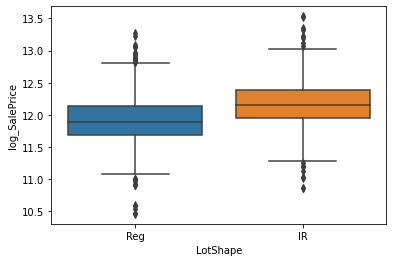

Reg    925
IR     535
Name: LotShape, dtype: int64


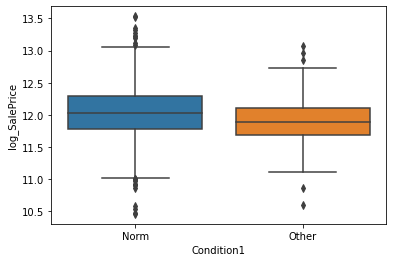

Norm     1260
Other     200
Name: Condition1, dtype: int64


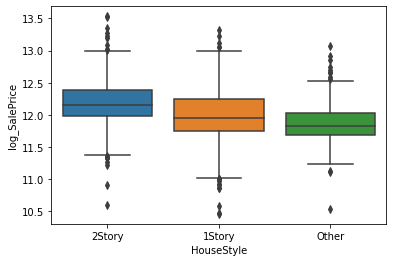

1Story    726
2Story    445
Other     289
Name: HouseStyle, dtype: int64


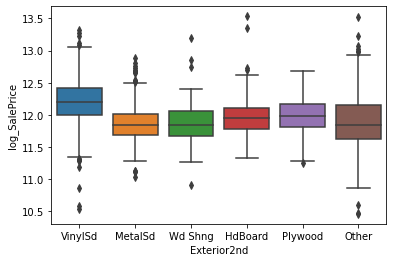

VinylSd    504
Other      355
MetalSd    214
HdBoard    207
Plywood    142
Wd Shng     38
Name: Exterior2nd, dtype: int64


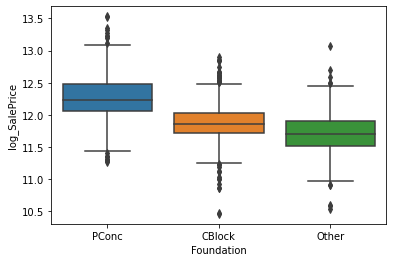

PConc     647
CBlock    634
Other     179
Name: Foundation, dtype: int64


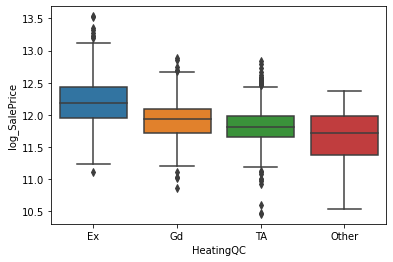

Ex       741
TA       428
Gd       241
Other     50
Name: HeatingQC, dtype: int64


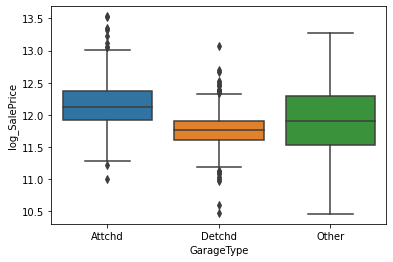

Attchd    870
Detchd    387
Other     203
Name: GarageType, dtype: int64


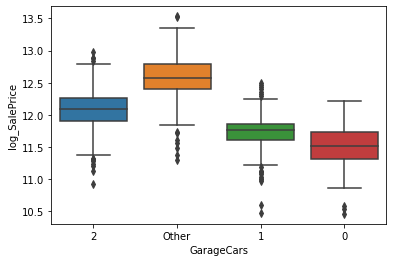

2        824
1        369
Other    186
0         81
Name: GarageCars, dtype: int64


In [26]:
change_categories(data)

for i in remake_list:
    sns.boxplot(data = data, x=i, y = 'log_SalePrice')
    plt.show()
    print(data[i].value_counts())

AxesSubplot(0.125,0.125;0.62x0.755)


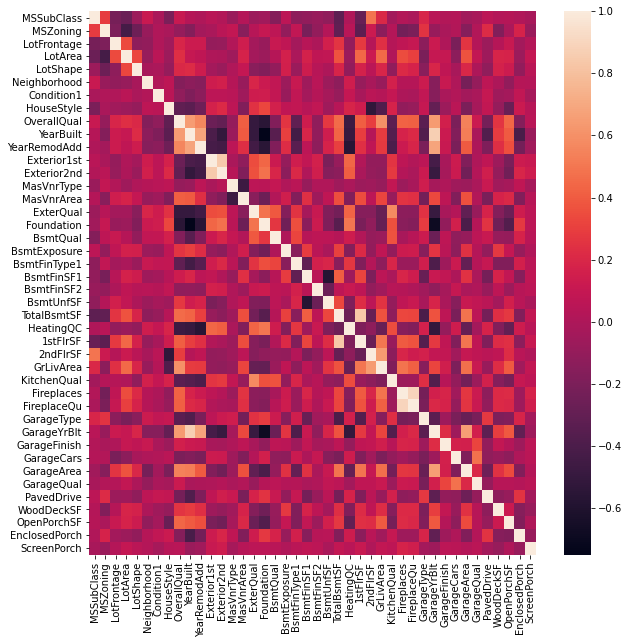

In [32]:
categorial_features = list(data.select_dtypes(include = ["object"]).columns)
number_features = list(data.select_dtypes(include = ["number"]).columns)
number_features.remove('SalePrice')
number_features.remove('log_SalePrice')
for i in categorial_features:
    fit_target_encoder(data, i, data['log_SalePrice'])
plt.figure(figsize = (10, 10))
print(sns.heatmap(data.drop(columns = ['SalePrice', 'log_SalePrice']).corr(method = 'spearman'), xticklabels = 1, yticklabels = 1))

In [33]:
encoder_data = data.copy()
#encoder_data = encoder_data.drop(columns = ['SalePrice', 'log_SalePrice'])
for i in categorial_features:
    fit_target_encoder(encoder_data, i, data['log_SalePrice'])   
corr_frame = pd.DataFrame()
all_features = number_features.copy()
all_features.extend(categorial_features)
corr = abs(encoder_data[all_features].corr(method = 'spearman'))
corr = corr.applymap(lambda x: 0 if x < 0.7 else 1)
while True:
    corr['number_relation'] = corr[corr == 1].sum()
    if corr['number_relation'].max() > 1:
        drop_feature = list(corr['number_relation'][corr['number_relation'] == corr['number_relation'].max()].index)
        corr.drop(index = drop_feature[0], columns = drop_feature[0], inplace = True)
    else:
        break

In [38]:
corr.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MSZoning', 'LotShape',
       'Neighborhood', 'Condition1', 'HouseStyle', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageQual', 'PavedDrive'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
scaler = StandardScaler()
data.fillna(0, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(data[corr.index], data['log_SalePrice'], test_size = 0.3, random_state=10) 

from sklearn.metrics import mean_squared_log_error as msle


In [ ]:
#dict_encoder = {}
for i in categorial_features:
    if i in corr.index:
        fit_target_encoder(x_train, i, y_train)

In [ ]:
for i in categorial_features:
    if i in corr.index:
        target_encoder(x_test, i)

MasVnrType
dict_keys(['BrkFace', 'None', 'Stone', 'BrkCmn'])
0 key not found in MasVnrType
BsmtQual
dict_keys(['Gd', 'TA', 'Ex', 'Fa'])
0 key not found in BsmtQual
BsmtExposure
dict_keys(['No', 'Gd', 'Mn', 'Av'])
0 key not found in BsmtExposure
BsmtFinType1
dict_keys(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'])
0 key not found in BsmtFinType1
FireplaceQu
dict_keys(['TA', 'Gd', 'Fa', 'Ex', 'Po'])
0 key not found in FireplaceQu
GarageFinish
dict_keys(['RFn', 'Unf', 'Fin'])
0 key not found in GarageFinish
GarageCars
dict_keys([2, 'Other', 1])
0 key not found in GarageCars
GarageQual
dict_keys(['TA', 'Fa', 'Gd', 'Ex', 'Po'])
0 key not found in GarageQual


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
reg = LinearRegression()
scaler.fit_transform(x_train)
data_arr_transform = [scaler.transform(x_train), y_train, scaler.transform(x_test), y_test]
model_estimator(reg, data_arr_transform)


train score 0.8834548254492587, test score 0.8953470820111131
trian log_loss 0.018193538721179535, test log_loss 0.017464695100944786


In [ ]:
from catboost import CatBoostRegressor
from catboost import cv, Pool
cat_features = []
for i in categorial_features:
    if i in x_train.columns:
        cat_features.append(str(i))
parametrs = {"iterations": 1000, "depth": 3, "loss_function": "RMSE", 'cat_features':cat_features}

In [ ]:
cat_boost = CatBoostRegressor(**parametrs, verbose = 0)
cat_boost.fit(x_train, y_train)

In [ ]:
cat_boost.score(x_train, y_train), cat_boost.score(x_test, y_test)

(0.9464408540192786, 0.9002465973400012)

In [ ]:
test = pd.read_csv('test.csv')
test.fillna(0, inplace = True)
result = pd.DataFrame()
result['Id'] = test['Id']
change_categories(test)
test = test[corr.index]
result['SalePrice'] = inverse_transform_func(cat_boost.predict(test))
result.to_csv('new_result.csv', index = False)